In [6]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import string
import kagglehub

# Download stopwords if not already downloaded
nltk.download('stopwords')

c:\Users\Wilso\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wilso\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
# Dataset 1

# Download latest version
path = kagglehub.dataset_download("hassanamin/textdb3")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/fake_or_real_news.csv")

# Combine title and text into a single column
df['combined'] = df['title'] + " " + df['text']

# Dropping the original title and text columns
df = df.drop(columns=['title', 'text'])

# Dropping the index column
df = df.drop(columns=['Unnamed: 0'])

# Renaming label values
df['label'] = df['label'].replace({'FAKE': 1, 'REAL': 0})

100%|██████████| 11.5M/11.5M [00:00<00:00, 51.9MB/s]

Extracting files...


Path to dataset files: C:\Users\Wilso\.cache\kagglehub\datasets\hassanamin\textdb3\versions\1


C:\Users\Wilso\AppData\Local\Temp\ipykernel_10552\986462432.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'FAKE': 1, 'REAL': 0})


In [8]:
# Dataset 2

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/fake-news-detection")

print("Path to dataset files:", path)

df2true = pd.read_csv(path + "/true.csv")
df2fake = pd.read_csv(path + "/fake.csv")

df2true = df2true.drop(columns=['subject', 'date'])
df2fake = df2fake.drop(columns=['subject', 'date'])

# Add a label column to each dataframe
df2fake['label'] = 1  # Label for fake news
df2true['label'] = 0  # Label for true news

# Combine the two df2true and df2fake dataframes
df2 = pd.concat([df2fake, df2true], ignore_index=True)

# Combine title and text
df2['combined'] = df2['title'] + " " + df2['text']

# Drop title and text columns
df2 = df2.drop(columns=['title', 'text'])

100%|██████████| 41.0M/41.0M [00:01<00:00, 39.4MB/s]

Extracting files...


Path to dataset files: C:\Users\Wilso\.cache\kagglehub\datasets\bhavikjikadara\fake-news-detection\versions\1


In [9]:
# Dataset 3

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

df3 = pd.read_csv(path + "/WELFake_Dataset.csv")

df3 = df3.drop(columns=['Unnamed: 0'])

# Combining title and text columns
df3['combined'] = df3['title'] + " " + df3['text']

# Drop title and text columns
df3 = df3.drop(columns=['title', 'text'])



100%|██████████| 92.1M/92.1M [00:01<00:00, 91.2MB/s]

Extracting files...


Path to dataset files: C:\Users\Wilso\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77


In [10]:
# Dataset 4 (Soccer Dataset)

# Download latest version
path = kagglehub.dataset_download("shawkyelgendy/fake-news-football")

print("Path to dataset files:", path)

df4fake = pd.read_csv(path + "/fake.csv")
df4true = pd.read_csv(path + "/real.csv")

df4fake['label'] = 1
df4true['label'] = 0

df4 = pd.concat([df4fake, df4true], ignore_index=True)

df4.rename(columns={'tweet': 'combined'}, inplace=True)

100%|██████████| 2.19M/2.19M [00:00<00:00, 27.7MB/s]

Extracting files...
Path to dataset files: C:\Users\Wilso\.cache\kagglehub\datasets\shawkyelgendy\fake-news-football\versions\1


In [11]:
df4.head()

,combined,label
0,"the tongue of his condition, now i saw things ...",1
1,"by god the great, after i saw the derby of wyd...",1
2,"believe in god, this zamalek fans are as good ...",1
3,the coach appeared in the media and told the t...,1
4,asno smito\nwhoever knows her tells me a massa...,1


In [12]:
# Download latest version
path = kagglehub.dataset_download("algord/fake-news")

print("Path to dataset files:", path)

df5 = pd.read_csv(path + "/FakeNewsNet.csv")

df5 = df5.drop(columns=['tweet_num', 'source_domain'])

df5.rename(columns={'real': 'label'}, inplace=True)

# Renaming label values
df5['label'] = df5['label'].replace({0: 1, 1: 0})

Path to dataset files: C:\Users\Wilso\.cache\kagglehub\datasets\algord\fake-news\versions\1


In [ ]:
# counter = 0
# def extract_paragraphs(url):
#     global counter  # Declare counter as global
#     if counter % 100 == 0:
#         print(counter)
#     counter += 1
#     try:
#         response = requests.get(url, timeout=10)
#         if response.status_code == 200:
#             soup = BeautifulSoup(response.content, 'html.parser')
#             paragraphs = soup.find_all('p')
#             return ' '.join([p.get_text() for p in paragraphs])
#         else:
#             return None
#     except Exception as e:
#         # print(f"Error fetching {url}: {e}")
#         return None

# # Apply the function to the news_url column
# df5['paragraph_text'] = df5['news_url'].apply(extract_paragraphs)
# df5.head()

In [15]:
df5.head()

,title,news_url,label,paragraph_text
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,0,"It all hit the fan on the final ""Real Housewiv..."
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,0,Travel plans? Our editors tested all of the ge...
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,0,"""Breyton 4eva!"" Sophia Bush took to Instagram ..."
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,0,By SARA MALM FOR MAILONLINE Published: 05:5...
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,0,None


In [16]:
df5.to_csv('df5bs.csv')

In [88]:
df = pd.concat([df, df2], ignore_index=True)
df = pd.concat([df, df3], ignore_index=True)
df = pd.concat([df, df4], ignore_index=True)
df.head()

,label,combined
0,1,You Can Smell Hillary’s Fear Daniel Greenfield...
1,1,Watch The Exact Moment Paul Ryan Committed Pol...
2,0,Kerry to go to Paris in gesture of sympathy U....
3,1,Bernie supporters on Twitter erupt in anger ag...
4,0,The Battle of New York: Why This Primary Matte...


In [89]:
df.shape

(165235, 2)

In [90]:
def preprocessing(df: pd.DataFrame) -> pd.DataFrame:

    # Dropping rows with missing values
    df = df.dropna()

    # Removing punctuation
    df['combined'] = df['combined'].str.replace(f"[{string.punctuation}]", "", regex=True)

    # Making all text lowercase
    df['combined'] = df['combined'].str.lower() 

    # stemming words
    stemmer = PorterStemmer()
    df['combined'] = df['combined'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

    # Removing curly apostrophe
    df['combined'] = df['combined'].str.replace("'", "", regex=False)
    df['combined'] = df['combined'].str.replace("’", "", regex=False)  

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    df['combined'] = df['combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return df

In [91]:
df = preprocessing(df)
df.head()

/var/folders/l_/lf6d8099353513n02jjnblsw0000gn/T/ipykernel_92213/4045329557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined'] = df['combined'].str.replace(f"[{string.punctuation}]", "", regex=True)
/var/folders/l_/lf6d8099353513n02jjnblsw0000gn/T/ipykernel_92213/4045329557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined'] = df['combined'].str.lower()
/var/folders/l_/lf6d8099353513n02jjnblsw0000gn/T/ipykernel_92213/4045329557.py:14: SettingWithCopyWarning: 
A value is tryin

,label,combined
0,1,smell hillary fear daniel greenfield shillman ...
1,1,watch exact moment paul ryan commit polit suic...
2,0,kerri go pari gestur sympathi us secretari sta...
3,1,berni support twitter erupt anger dnc tri warn...
4,0,battl new york whi thi primari matter primari ...


In [92]:
df.shape

(164621, 2)

In [93]:
X = df['combined']
y = df['label']

In [94]:
# X: feature matrix, y: target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [95]:
# View training and testing data
print("Training data:")
print(X_train.shape)
print(y_train.shape)
print("Testing data:")
print(X_test.shape)
print(y_test.shape)

Training data:
(131696,)
(131696,)
Testing data:
(32925,)
(32925,)


In [96]:
y_train.value_counts()

label
1    66688
0    65008
Name: count, dtype: int64

In [97]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [98]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))

# Hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_tfidf, y_train, epochs=20, batch_size=32, validation_split=0.2, shuffle=True)

# Summary of the model
# model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9132 - loss: 0.2232 - val_accuracy: 0.9578 - val_loss: 0.1093
Epoch 2/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9703 - loss: 0.0806 - val_accuracy: 0.9660 - val_loss: 0.0887
Epoch 3/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9857 - loss: 0.0415 - val_accuracy: 0.9692 - val_loss: 0.0988
Epoch 4/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9926 - loss: 0.0215 - val_accuracy: 0.9703 - val_loss: 0.1117
Epoch 5/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9705 - val_loss: 0.1312
Epoch 6/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9974 - loss: 0.0075 - val_accuracy: 0.9710 - val_loss: 0.1508
Epoch 7/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9706 - val_loss: 0.1799
Epoch 8/20
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9990 - loss: 0.0032 - 

In [99]:
# Transform X_test using the trained TfidfVectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_tfidf, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9713 - loss: 0.2695
Test Loss: 0.2799360454082489
Test Accuracy: 0.9710250496864319


1029/1029 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step


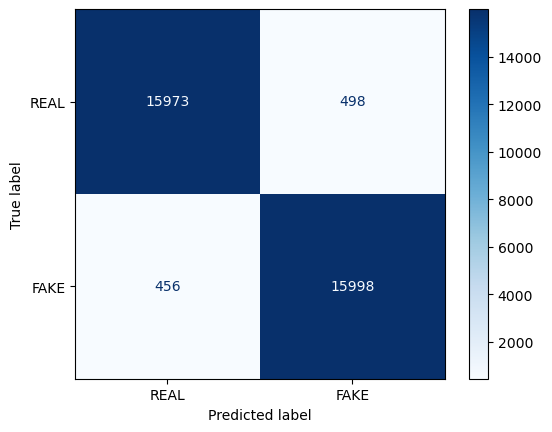

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['REAL', 'FAKE'])
disp.plot(cmap='Blues')

In [101]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['REAL', 'FAKE'])

# Print the report
print(report)

              precision    recall  f1-score   support

        REAL       0.97      0.97      0.97     16471
        FAKE       0.97      0.97      0.97     16454

    accuracy                           0.97     32925
   macro avg       0.97      0.97      0.97     32925
weighted avg       0.97      0.97      0.97     32925

